In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Durga Bhavani\Downloads\train_house.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [5]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [6]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

##### compute frequecy with every feature

<AxesSubplot:xlabel='BsmtQual'>

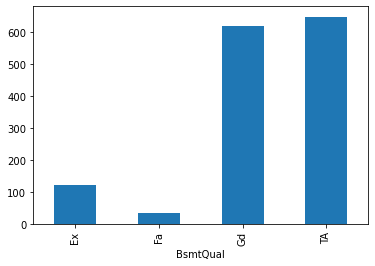

In [7]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [10]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='GarageType'>

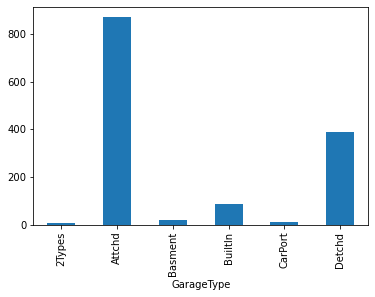

In [12]:
df.groupby(['GarageType'])['GarageType'].count().plot.bar()

<AxesSubplot:xlabel='FireplaceQu'>

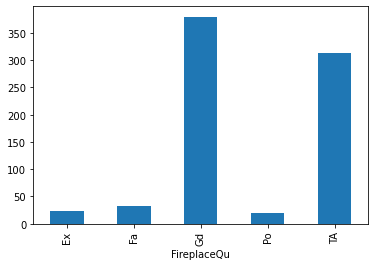

In [13]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().plot.bar()

##### replacing function

In [17]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [21]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace = True)

In [22]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [23]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### adding a variable to capture nan values

In [44]:
df = pd.read_csv(r'C:\Users\Durga Bhavani\Downloads\train_house.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [45]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [46]:
df['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [47]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [48]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [49]:
frequent = df['BsmtQual'].mode()[0]

In [50]:
frequent

'TA'

In [51]:
df['BsmtQual'].fillna(frequent,inplace = True)

In [43]:
df['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

#### if more frequent categories, replace withnew vategory

In [52]:
df = pd.read_csv(r'C:\Users\Durga Bhavani\Downloads\train_house.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [53]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
def impute_nan(df,variable):
    df[variable+"newvar"] = np.where(df[variable].isnull(),"missing",df[variable])

In [55]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [56]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [57]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis = 1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,missing,Attchd
